In [43]:
import ujson as uj
import pandas as pd
import feather
import random
from utils import render_single, render_multiple, get_pixel_data, get_dataset_files, extract_random_entries, generate_pixel_columns
from IPython.display import display, Image as IPImage
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = [extract_random_entries(file, 1000) for file in [get_dataset_files()[0]]]

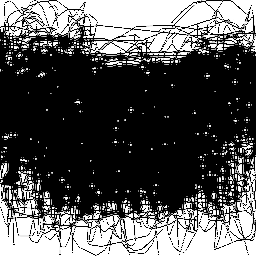

In [57]:
flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame.from_dict(flat_data, orient='columns')
imgs = df.sample(100)['drawing']
display(IPImage(render_multiple(imgs, magnification=10)))

In [4]:
flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame.from_dict(flat_data, orient='columns')
df2 = generate_pixel_columns(df).drop(columns=['countrycode', 'timestamp', 'recognized', 'key_id', 'drawing'])

#df2.to_feather('../processed.dat')

NameError: name 'data' is not defined

In [3]:
#df3 = pd.read_feather('../processed.dat')
#print(df3)

#one hot encode words
word_columns = pd.get_dummies(df2['word'])
result = pd.concat([df2, word_columns], axis=1).drop(columns=['word'])
print(result)
result.to_feather('../processed.dat')

NameError: name 'df2' is not defined

In [5]:
# from IPython.display import Image, display

# all_drawings = df[(df['recognized'] == True) & (df['countrycode'] == 'JP')]['drawing']
# drawings = all_drawings if len(all_drawings) < 1000 else all_drawings.sample(1000)
# display(Image(convert_many(drawings)))